## Introduction
### Data Description
> A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3
### Question(s) for Analysis
><ol>
    <li> what is Target variable- Churn? </li>
    <li> what is the percentage of customers associated with the company that left it</li>
    <li> what is frequency distributions for  the tenure?</li>
    <li> probability each type of customer  to subscribes home phone service with the company?</li>
    <li> probability each type of customer  to subscribes home phone service with the company?</li>
    <li> probability customer subscribes DSL or Fiber if he had subscribed home phone service with the company? </li>
    <li> probability that the customer  subscribes online security if he  subscribes home phone service with the company?</li>
    <li> probability that the customer  subscribes TechSupport if he  subscribes home phone service with the company? </li>
    <li> what is  Calculating confidence interval for difference in mean total charges between males and females? </li>
</ol>

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [702]:
#import package and load dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("Telco-Customer-Churn.csv")

In [703]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## type of data
<ul>
<li> 1) customerID > categoral nominal </li>
<li> 2) gender > categoral nominal </li>
<li> 3) SeniorCitizen > categoral ordinal </li>
<li> 4) Partner > categoral nominal </li>
<li> 5) Dependents > categoral nominal </li>
<li> 6) tenure > quantitative discrite </li>
<li> 7) PhoneService > categoral nominal </li>
<li> 8) MultipleLines > categorical nominal </li>
<li> 9) InternetService > categorical nominal </li>
<li> 10) OnlineSecurity > categorical nominal </li>
<li> 11) OnlineBackup > categorical nominal </li>
<li> 12) DeviceProtection > categorical nominal </li>
<li> 13) TechSupport > categorical nominal </li>
<li> 14) StreamingTV > categorical nominal </li>
<li> 15) StreamingMovies > categorical nominal </li>
<li> 16) Contract > quantitative discrite </li>
<li> 17) PaperlessBilling > categorical nominal </li>
<li> 18) PaymentMethod > categorical nominal </li>
<li> 19) MonthlyCharges > quintative continous </li>
<li> 20) TotalCharges > quintative continous </li>
<li> 21) Churn > categorical nominal</li>
</ul>

In [704]:
print(df.shape)
print(df.info())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [705]:
#check data type of object TotalCharges
type(df['TotalCharges'][0])

str

In [706]:
#the column of TotalCharges is blanks 
df[df['TotalCharges'].isin([" "])] == True

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
753,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1082,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1340,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3826,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4380,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### any column content nan value
><ol>
    <li> column TotalCharges content blanks value and is numerical continuous </li>
</ol>

### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [707]:
# fill in the blanks value by nan
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)

In [746]:
# Validate that we have addressed any NaN values
print(df.isnull().values.any())
df.isnull().sum()

False


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [708]:
# convert the coulmn TotalCharges to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [709]:
#check from converted
type(df['TotalCharges'][0])

numpy.float64

In [710]:
# fill NaN value for TotalCharges column
df['TotalCharges'] = df['TotalCharges'].fillna(df['tenure']* df['MonthlyCharges'])

In [711]:
# check if there find duplicate data
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration.
**Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section


In [712]:
# Describe the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Question 1) what is Target variable- Churn?

In [747]:
df.groupby('Churn').size() / len(df)

Churn
No     0.73463
Yes    0.26537
dtype: float64

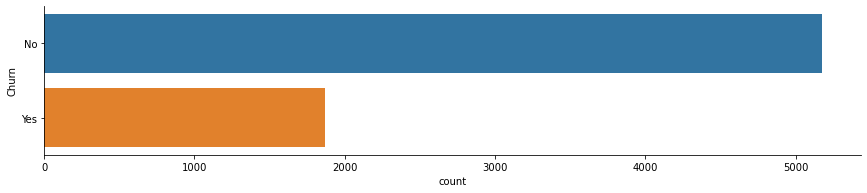

In [753]:
sns.catplot(data=df,y='Churn',kind = 'count',height=2.6, aspect=4.6)

### Question 2) what is the percentage of customers associated with the company that left it ?

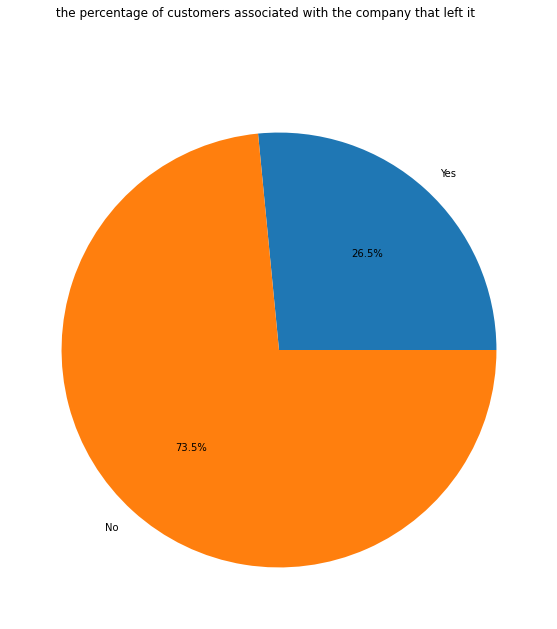

In [754]:
# 'Yes' means that the customer left the compony.
# 'No'  means that the customer still subscribe in the company.
associated = len(df[df["Churn"]=="No"])
Left = len(df[df["Churn"]=="Yes"])
Churn = np.array([Left,associated])
plt.figure(figsize=(15,10))
plt.suptitle(" the percentage of customers associated with the company that left it ")
mylabels = ["Yes", "No"]
plt.pie(Churn, labels = mylabels,autopct='%1.1f%%')
plt.show() 

### Question 3) what is frequency distributions for  the tenure?

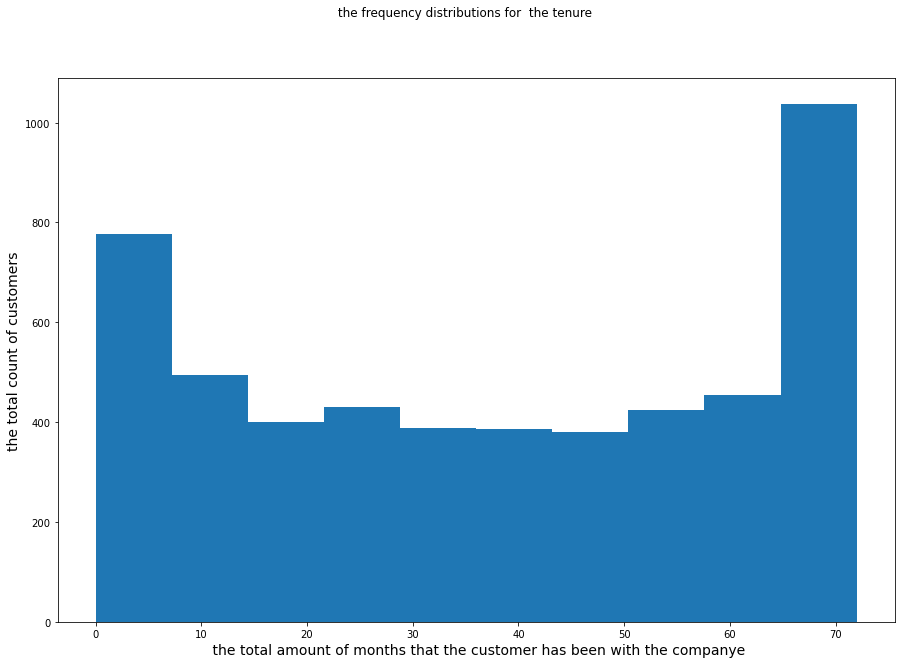

In [755]:
x = df.query("Churn == 'No' ")["tenure"].values
plt.figure(figsize=(15,10))
plt.xlabel(" the total amount of months that the customer has been with the companye",fontsize=14)
plt.ylabel("the total count of customers",fontsize=14)
plt.suptitle(" the frequency distributions for  the tenure")
plt.hist(x)
plt.show()

### Questions 4) How many customers subscribe to each service?

In [715]:
# Function for get the count of customers with type Services
def getCount(typeService):
    res = df.query("Churn == 'No' ").groupby(typeService).size()
    service = []
    for x in range(res.size):
        service.append(res.values[x])
    return service

In [716]:
# Function for get the Pie shape with type Services
def pieShape(x,mylabels,title,x_axis,y_axis):
    axs[x_axis,y_axis].pie(x, labels = mylabels,autopct='%1.1f%%')
    axs[x_axis,y_axis].set_title(title)

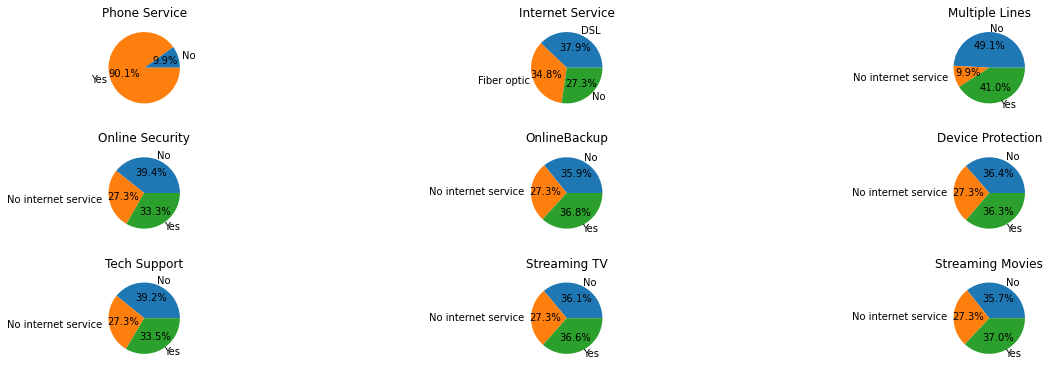

In [717]:
fig , axs = plt.subplots(3, 3)
# PhoneService 
mylabels = ["No","Yes"]
pieShape(getCount('PhoneService'),mylabels,"Phone Service",0,0)
# InternetService
mylabels = ["DSL", "Fiber optic","No"]
pieShape(getCount('InternetService'),mylabels,"Internet Service",0,1)
# MultipleLines
mylabels = ["No", "No internet service ","Yes"]
pieShape(getCount('MultipleLines'),mylabels,"Multiple Lines",0,2)
# OnlineSecurity
pieShape(getCount('OnlineSecurity'),mylabels,"Online Security",1,0)
# OnlineBackup
pieShape(getCount('OnlineBackup'),mylabels,"OnlineBackup",1,1)
# DeviceProtection
pieShape(getCount('DeviceProtection'),mylabels,"Device Protection",1,2)
# TechSupport
pieShape(getCount('TechSupport'),mylabels,"Tech Support",2,0)
# StreamingTV
pieShape(getCount('StreamingTV'),mylabels,"Streaming TV",2,1)
# StreamingMovies
pieShape(getCount('StreamingMovies'),mylabels,"Streaming Movies",2,2)
fig.tight_layout(pad=1.08, h_pad=2, w_pad=1.0, rect=(0, 0, 3, 1.31))

### Questions 5) probability each type of customer  to subscribes home phone service with the company?

In [718]:
# What proportion of gender male who subscribes home phone service ?
#df.query("gender == 'Male'")['PhoneService'].mean()
Male = df[df["gender"]=="Male"]
Female = df[df["gender"]=="Female"]
Pro_Male = len(Male) / len(df)
Pro_Female = len(Female) / len(df)
Pro_Male , Pro_Female

(0.504756495811444, 0.495243504188556)

In [719]:
sub_male = len(Male[Male['PhoneService']=="Yes"]) / len(Male)
nosub_male = len(Male[Male['PhoneService']=="No"]) / len(Male)
sub_male , nosub_male

(0.9012658227848102, 0.09873417721518987)

In [720]:
sub_female = len(Female[Female['PhoneService']=="Yes"]) / len(Female)
nosub_female = len(Female[Female['PhoneService']=="No"]) / len(Female)
sub_female , nosub_female

(0.9051032110091743, 0.09489678899082568)

In [721]:
# what is probability who subscribe is male
res = (Pro_Male * sub_male / ((sub_male* Pro_Male)+(sub_female*Pro_Female)))*100
res

50.36943876748939

In [722]:
# what is probability who subscribe is Female
res = (Pro_Female * sub_female / ((sub_male* Pro_Male)+(sub_female*Pro_Female)))*100
res

49.630561232510615

### Questions 6)  probability customer  subscribes DSL or Fiber if he  had subscribed home phone service with the company?

In [723]:
# What proportion of customer that is Dsl or Fiber or no service ?
Dsl = df[df['InternetService']=="DSL"]
Fiber = df[df['InternetService']=="Fiber optic"]
NoInternet = df[df['InternetService']=="No"]
pro_Dsl =  len(Dsl) / len(df)
pro_Fiber = len(Fiber) / len(df)
pro_NoInternet = len(NoInternet) / len(df)
pro_Dsl ,pro_Fiber ,pro_NoInternet 

(0.34374556297032516, 0.4395854039471816, 0.21666903308249325)

In [724]:
# What proportion of customer who subscribes Dsl or Fiber or no service ?
sub_dsl = df.query("PhoneService == 'Yes' & InternetService == 'DSL'")
sub_fiber = df.query("PhoneService == 'Yes' & InternetService == 'Fiber optic'")
sub_nointernet = df.query("PhoneService == 'Yes' & InternetService == 'No'")
pro_sub_dsl =  len(sub_dsl) / len(Dsl)
pro_sub_fiber = len(sub_fiber) / len(Fiber)
pro_sub_nointernet = len(sub_nointernet) / len(NoInternet)
pro_sub_dsl,pro_sub_fiber, pro_sub_nointernet

(0.7182982238744321, 1.0, 1.0)

In [725]:
# What proportion of customer subscribes DSL or Fiber Optical if he hadn't subscribed PhoneService ?
nosub_dsl = df.query("PhoneService == 'No' & InternetService == 'DSL'")
nosub_fiber = df.query("PhoneService == 'No' & InternetService == 'Fiber optic'")
nosub_nointernet = df.query("PhoneService == 'No' & InternetService == 'No'")
pro_nosub_dsl =  len(nosub_dsl) / len(Dsl)
pro_nosub_fiber = len(nosub_fiber) / len(Fiber)
pro_nosub_nointernet = len(nosub_nointernet) / len(NoInternet)
pro_nosub_dsl,pro_nosub_fiber, pro_nosub_nointernet

(0.28170177612556796, 0.0, 0.0)

In [726]:
# what is probability that customer is DSL if he subscribe
res =  pro_Dsl * (pro_sub_dsl )/ ((pro_sub_dsl * pro_Dsl)+(pro_sub_fiber*pro_Fiber)+(pro_sub_nointernet*pro_NoInternet))
res *100

27.338468794214748

In [727]:
# what is probability that customer is Fiber if he subscribe
res =  pro_Fiber * (pro_sub_fiber )/ ((pro_sub_dsl * pro_Dsl)+(pro_sub_fiber*pro_Fiber)+(pro_sub_nointernet*pro_NoInternet))
res *100

48.67159251689986

In [728]:
# what is probability that customer is No Internet if he subscribe
res =  pro_NoInternet * (pro_sub_nointernet)/ ((pro_sub_dsl * pro_Dsl)+(pro_sub_fiber*pro_Fiber)+(pro_sub_nointernet*pro_NoInternet))
res *100

23.989938688885395

### Questions 7) probability that the customer  subscribes online security if he  subscribes home phone service with the company?

In [729]:
# What proportion of customer is subscribe OnlineSecurity ?
Yes = df[df['OnlineSecurity']=="Yes"]
No_internet_service = df[df['OnlineSecurity']=="No internet service"]
No = df[df['OnlineSecurity']=="No"]
pro_Yes =  len(Yes) / len(df)
pro_No_internet_service = len(No_internet_service) / len(df)
pro_No = len(No) / len(df)
pro_Yes ,pro_No_internet_service ,pro_No 

(0.2866676132329973, 0.21666903308249325, 0.4966633536845094)

In [730]:
# What proportion of  customer who subscribes OnlineSecurity ?
sub_yes = df.query("PhoneService == 'Yes' & OnlineSecurity == 'Yes'")
sub_nointernet = df.query("PhoneService == 'Yes' & OnlineSecurity == 'No internet service'")
sub_no = df.query("PhoneService == 'Yes' & OnlineSecurity == 'No'")
pro_sub_yes =  len(sub_yes) / len(Yes)
pro_sub_nointernet = len(sub_nointernet) / len(No_internet_service)
pro_sub_no = len(sub_no) / len(No)
pro_sub_yes,pro_sub_nointernet, pro_sub_no 

(0.8598315998018822, 1.0, 0.885934819897084)

In [731]:
# what probability that customer is subscribe in OnlineSecurity if he is had phone service
res =  pro_Yes * (pro_sub_yes )/ ((pro_sub_yes * pro_Yes)+(pro_sub_nointernet*pro_No_internet_service)+(pro_sub_no*pro_No))
res *100

27.291306398365034

In [732]:
# what probability that customer is no subscribe in OnlineSecurity if he is had phone service
res =  pro_No * (pro_sub_no )/ ((pro_sub_yes * pro_Yes)+(pro_sub_nointernet*pro_No_internet_service)+(pro_sub_no*pro_No))
res *100

48.71875491274956

In [733]:
# what probability that customer is no have Internet service in OnlineSecurity if he is had phone service
res =  pro_No_internet_service * (pro_sub_nointernet )/ ((pro_sub_yes * pro_Yes)+(pro_sub_nointernet*pro_No_internet_service)+(pro_sub_no*pro_No))
res *100

23.989938688885395

### Questions 8) probability that the customer  subscribes TechSupport if he  subscribes home phone service with the company?

In [734]:
# What proportion of customer is subscribe TechSupport ?
Yes = df[df['TechSupport']=="Yes"]
No_internet_service = df[df['TechSupport']=="No internet service"]
No = df[df['TechSupport']=="No"]
pro_Yes =  len(Yes) / len(df)
pro_No_internet_service = len(No_internet_service) / len(df)
pro_No = len(No) / len(df)
pro_Yes ,pro_No_internet_service ,pro_No 

(0.2902172369728809, 0.21666903308249325, 0.4931137299446259)

In [735]:
# What proportion of  customer who subscribes TechSupport ?
sub_yes = df.query("PhoneService == 'Yes' & TechSupport == 'Yes'")
sub_nointernet = df.query("PhoneService == 'Yes' & TechSupport == 'No internet service'")
sub_no = df.query("PhoneService == 'Yes' & TechSupport == 'No'")
pro_sub_yes =  len(sub_yes) / len(Yes)
pro_sub_nointernet = len(sub_nointernet) / len(No_internet_service)
pro_sub_no = len(sub_no) / len(No)
pro_sub_yes,pro_sub_nointernet, pro_sub_no 

(0.8586105675146771, 1.0, 0.8868413475381515)

In [736]:
# what probability that customer is subscribe in TechSupport if he is had phone service
res =  pro_Yes * (pro_sub_yes )/ ((pro_sub_yes * pro_Yes)+(pro_sub_nointernet*pro_No_internet_service)+(pro_sub_no*pro_No))
res *100

27.590001572079863

In [737]:
# what probability that customer is no subscribe in TechSupport if he is had phone service
res =  pro_No * (pro_sub_no )/ ((pro_sub_yes * pro_Yes)+(pro_sub_nointernet*pro_No_internet_service)+(pro_sub_no*pro_No))
res *100

48.42005973903475

In [738]:
# what probability that customer is no have Internet service in TechSupport if he is had phone service
res =  pro_No_internet_service * (pro_sub_nointernet )/ ((pro_sub_yes * pro_Yes)+(pro_sub_nointernet*pro_No_internet_service)+(pro_sub_no*pro_No))
res *100

23.989938688885395

### Questions 9) what is  Calculating confidence interval for difference in mean total charges between males and females ?

In [739]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [740]:
# Create dataframe and compute the mean for TotalCharges  with all Male and Female 
male_mean = df.query("gender == 'Male'")['TotalCharges'].mean()
female_mean = df.query("gender == 'Female'")['TotalCharges'].mean()
male_mean,female_mean

(2279.5540084388176, 2279.918061926605)

In [741]:
# Compute observed difference in the mean for TotalCharges
obs_diff = female_mean - male_mean 
obs_diff

0.36405348778725966

In [742]:
# Create sampling distribution for difference in the mean for TotalCharges with all Male and Female 
# with boostrapping
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0],replace = True)
    male_mean = b_samp.query("gender == 'Male'")['TotalCharges'].mean()
    female_mean = b_samp.query("gender == 'Female'")['TotalCharges'].mean()
    diffs.append(female_mean-male_mean)

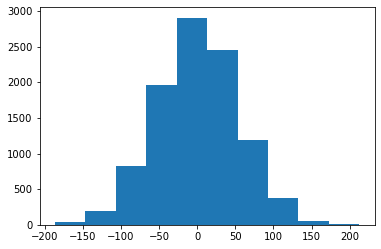

In [743]:
# convert to numpy array
diffs = np.array(diffs)
plt.hist(diffs)
plt.show()

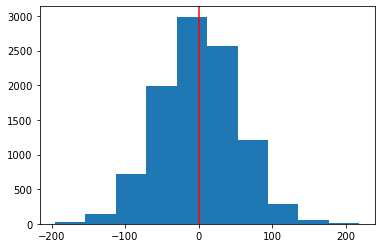

In [744]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0,diffs.std(),diffs.size)
plt.hist(null_vals)
plt.axvline(x=obs_diff,color='red')
plt.show()

In [745]:
# compute p value
(null_vals>obs_diff).mean()

0.4979